In [331]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import random
import matplotlib.cm as cm

In [332]:
class Point(object):
    def __init__(self, t_features, t_label):
        self.features = t_features
        self.label = t_label
        

In [333]:
class KMeans(object):
    def __init__(self, t_nbr_cluster, t_nbr_data, t_min_x, t_max_x):
        self.nbr_cluster = t_nbr_cluster
        self.min_x = t_min_x
        self.max_x = t_max_x
        self.nbr_data = t_nbr_data
        #self.color_dict = cm.rainbow(np.linspace(0, 1, self.nbr_cluster))
        self.color_dict = { 0 : 'red', 1 : 'blue', 2 :'green'}
        
        self.X = self.load_data()
        self.centroid_index = self.get_random_centroid_index()
        self.centroid = self.get_centroid()
        self.update_colors()
        
    def load_data(self):
        points = list()
        generated_points = sklearn.datasets.samples_generator.make_blobs(n_samples=self.nbr_data,
                                                        centers=self.nbr_cluster,
                                                        n_features=2, random_state=0,
                                                        center_box=(self.min_x, self.max_x))
        for i,x in enumerate(generated_points[0]):
            points.append(Point(x, random.choice(generated_points[1])))
        return points
        
    def draw(self):
        for point in self.X:
            plt.scatter(point.features[0], point.features[1], color='blue')
        for x in self.centroid_index:
            plt.scatter(self.X[x].features[0], self.X[x].features[1], color='red')
        
    def get_random_centroid_index(self):
        return [np.random.randint(0, self.nbr_data) for x in range(self.nbr_cluster)]
    
    def get_centroid(self):
        return [self.X[i] for i in self.centroid_index]
    
    def calc_distance(self, point, centroid):
        dist_sum = 0
        for i,f in enumerate(point.features):
            dist_sum += (f - centroid.features[i]) ** 2 
        return sqrt(dist_sum)
    
    def update_centroids(self):
        for c in self.centroid:
            for i,f in enumerate(c.features):
                feat_sum = 0
                points = [x for x in self.X if x.label == c.label]
                for p in points:
                    feat_sum += p.features[i]  
                c.features[i] = feat_sum / len(points)

        
    def update_labels(self):
        distances = list()
        for i,x in enumerate(self.X):
            current_label = x.label
            centroid_list = list()
            for c in self.centroid:
                    centroid_list.append(self.calc_distance(x, c))
            distances.append(centroid_list)
            if current_label != distances[i].index(min(distances[i])):
                x.label = distances[i].index(min(distances[i]))                   
     
    def update_colors(self):
        for point in self.X: 
            plt.scatter(point.features[0], point.features[1], color=self.color_dict[point.label])
        for c in self.centroid:
            plt.scatter(c.features[0], c.features[1], marker='+', color=self.color_dict[c.label], s=200)
            
    def iterate(self, nbr_it):
        for i in range(nbr_it):
            self.update_centroids()
            self.update_labels()

[43, 2, 16]

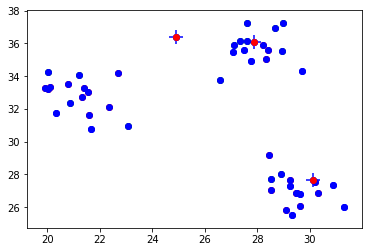

In [334]:
testkm = KMeans(3, 50, 0, 50)
testkm.draw()
testkm.centroid_index
#testkm.X[0].shape[0]

In [335]:
testkm.update_labels()
#for x in testkm.X:
#    print(x.label)

In [336]:
testarray = [28, 56, 8, 1, 5]
testarray.index(min(testarray))

3

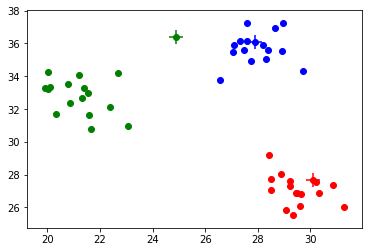

In [337]:
testkm.update_labels()
testkm.update_colors()

In [338]:
testkm.iterate(1000)

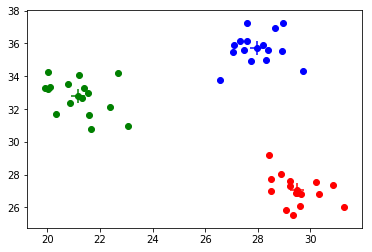

In [339]:
testkm.update_colors()

In [340]:
testkm.iterate(1000)

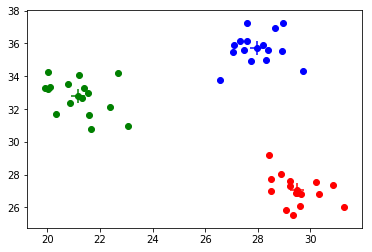

In [341]:
testkm.update_colors()